<a href="https://colab.research.google.com/github/Vyoma-garg/Deep_Learning/blob/main/1_mnist_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [5]:
(x_train, y_train), (x_test, y_test)= keras.datasets.mnist.load_data()
x_train.shape


(60000, 28, 28)

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
x_train[0]    #0=BLACK, 255=WHITE

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [9]:
x_train[0].shape

(28, 28)

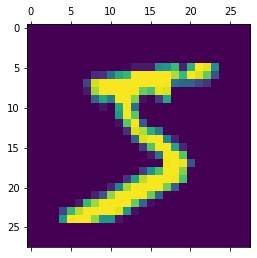

In [10]:
plt.matshow(x_train[0])

In [11]:
y_train[0]

5

In [12]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [20]:
x_train=x_train/255  #scaling
x_test=x_test/255

In [21]:
x_train_flattened= x_train.reshape(len(x_train), 28*28)
x_train_flattened.shape

(60000, 784)

In [22]:
x_test_flattened= x_test.reshape(len(x_test), 28*28)
x_test_flattened.shape

(10000, 784)

In [23]:
x_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

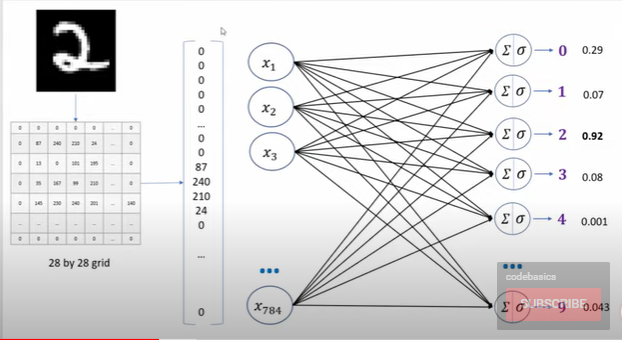

In [24]:
model= keras.Sequential([
                         keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4683 - accuracy: 0.8793
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.9149
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2832 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2670 - accuracy: 0.9258


In [25]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2709 - accuracy: 0.9253


[0.2708556056022644, 0.9253000020980835]

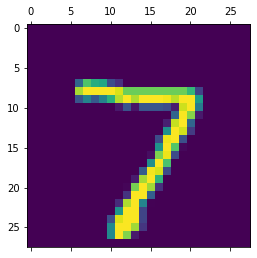

In [27]:
plt.matshow(x_test[0])

In [29]:
pred=model.predict(x_test_flattened)
pred

array([[2.7796000e-02, 7.5254940e-07, 3.1491429e-02, ..., 9.9980468e-01,
        9.7065508e-02, 7.0456266e-01],
       [4.0246752e-01, 7.2607994e-03, 9.9919534e-01, ..., 1.2928868e-12,
        2.4190530e-01, 2.5915210e-09],
       [5.0753355e-04, 9.9547386e-01, 7.0812261e-01, ..., 1.9079274e-01,
        5.1201743e-01, 5.9663981e-02],
       ...,
       [5.1346901e-06, 1.5397338e-05, 1.7141998e-03, ..., 3.5941625e-01,
        6.7510796e-01, 8.7279916e-01],
       [1.6373396e-04, 6.6664815e-04, 2.3558736e-04, ..., 6.6317138e-05,
        7.7956593e-01, 1.7306209e-04],
       [8.9102685e-03, 1.6830413e-09, 2.7760905e-01, ..., 4.5621384e-08,
        7.1772933e-04, 1.3199998e-06]], dtype=float32)

In [30]:
pred.shape

(10000, 10)

In [31]:
pred[0]

array([2.7796000e-02, 7.5254940e-07, 3.1491429e-02, 9.5492119e-01,
       3.1422675e-03, 1.0430491e-01, 1.6371672e-06, 9.9980468e-01,
       9.7065508e-02, 7.0456266e-01], dtype=float32)

In [32]:
np.argmax(pred[0])

7

In [34]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [33]:
pred_labels= [np.argmax(i) for i in pred]
pred_labels[:5]

[7, 2, 1, 0, 4]

In [37]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    1,    2,    0,    4,   10,    2,    4,    1],
       [   0, 1114,    3,    2,    0,    1,    4,    2,    9,    0],
       [   5,    9,  920,   14,    6,    3,   13,   12,   46,    4],
       [   3,    0,   19,  925,    0,   13,    4,   12,   27,    7],
       [   1,    2,    3,    1,  915,    0,   14,    4,   10,   32],
       [   9,    3,    2,   43,   11,  744,   21,    8,   44,    7],
       [   9,    3,    5,    0,    8,    6,  920,    2,    5,    0],
       [   1,    6,   20,    6,    7,    0,    0,  955,    2,   31],
       [   5,    9,    6,   13,    9,   16,    9,   11,  888,    8],
       [   9,    7,    1,   10,   29,    3,    0,   21,   13,  916]],
      dtype=int32)>

Text(69.0, 0.5, 'truth')

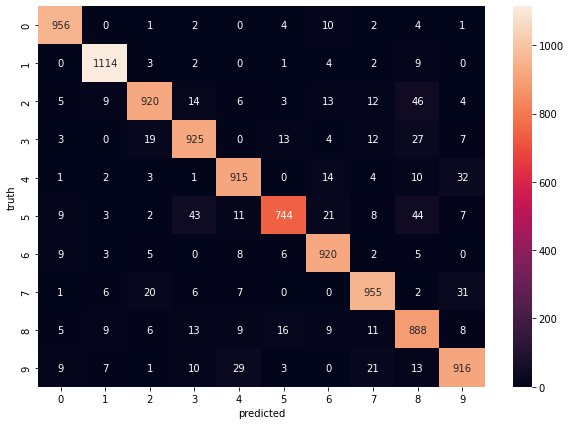

In [39]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

# MODEL 2: with a hidden layer

In [41]:
model= keras.Sequential([
                         keras.layers.Dense(100, input_shape=(784,), activation='relu'),
                         keras.layers.Dense(10, activation='sigmoid')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

model.fit(x_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2717 - accuracy: 0.9225
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1215 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0844 - accuracy: 0.9746
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0658 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9842


In [42]:
model.evaluate(x_test_flattened, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0802 - accuracy: 0.9746


[0.08017875999212265, 0.9746000170707703]

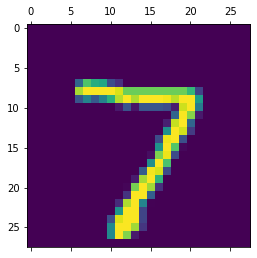

In [43]:
plt.matshow(x_test[0])

In [44]:
pred=model.predict(x_test_flattened)
pred

array([[1.65733695e-03, 4.06730175e-03, 8.62854838e-01, ...,
        9.99994516e-01, 5.31670749e-02, 1.37682140e-01],
       [5.88201642e-01, 9.60989833e-01, 9.99995351e-01, ...,
        1.64573706e-07, 4.24921483e-01, 5.93564209e-06],
       [2.70572305e-03, 9.95067716e-01, 1.00153774e-01, ...,
        3.04039240e-01, 1.47944003e-01, 1.56122446e-03],
       ...,
       [5.06947363e-05, 3.36289406e-04, 3.49264483e-05, ...,
        8.31000149e-01, 3.91637832e-01, 9.94526148e-01],
       [4.52262163e-03, 2.66641378e-04, 2.67654657e-04, ...,
        1.46436691e-03, 9.27573085e-01, 1.66773796e-04],
       [1.66164666e-01, 5.42258240e-05, 3.41838002e-02, ...,
        9.16481713e-06, 3.78704071e-03, 9.15676355e-04]], dtype=float32)

In [45]:
pred.shape

(10000, 10)

In [46]:
pred[0]

array([1.6573370e-03, 4.0673018e-03, 8.6285484e-01, 9.6946216e-01,
       2.4322069e-05, 6.1506629e-02, 2.8267109e-06, 9.9999452e-01,
       5.3167075e-02, 1.3768214e-01], dtype=float32)

In [47]:
np.argmax(pred[0])

7

In [48]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [49]:
pred_labels= [np.argmax(i) for i in pred]
pred_labels[:5]

[7, 2, 1, 0, 4]

In [50]:
cm=tf.math.confusion_matrix(labels=y_test, predictions=pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    1,    3,    1,    0,    4,    1,    2,    0],
       [   0, 1123,    2,    3,    0,    0,    3,    0,    4,    0],
       [   6,    1, 1000,    6,    1,    0,    2,    7,    8,    1],
       [   0,    0,    2,  998,    0,    2,    0,    6,    1,    1],
       [   0,    0,    3,    0,  951,    0,    7,    2,    1,   18],
       [   2,    0,    0,   13,    1,  861,    7,    0,    7,    1],
       [   3,    3,    2,    1,    1,    2,  940,    2,    4,    0],
       [   2,    2,    6,    6,    2,    0,    0,  999,    2,    9],
       [   1,    0,    3,   19,    5,    2,    3,    3,  934,    4],
       [   2,    3,    0,   14,   10,    4,    0,    2,    2,  972]],
      dtype=int32)>

Text(69.0, 0.5, 'truth')

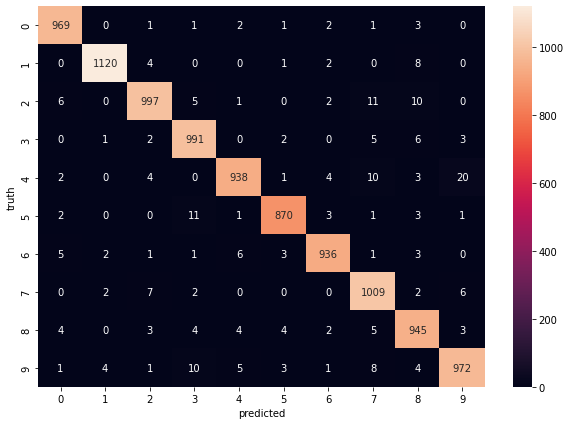

In [59]:
import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

# MODEL3: adding Flatten layer 

In [53]:
model= keras.Sequential([
                         keras.layers.Flatten(input_shape=(28,28)),
                         keras.layers.Dense(100, activation='relu'),
                         keras.layers.Dense(10, activation='sigmoid')
])

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics= ['accuracy'])

model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2690 - accuracy: 0.9235
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1228 - accuracy: 0.9644
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0881 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0658 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9833


In [54]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0829 - accuracy: 0.9747


[0.0829176977276802, 0.9746999740600586]

Text(69.0, 0.5, 'truth')

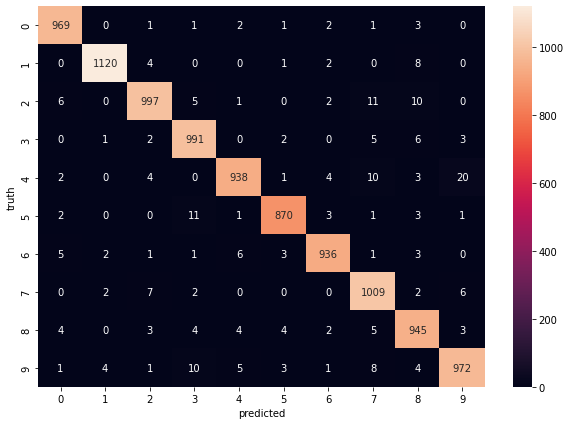

In [56]:
pred=model.predict(x_test)
pred_labels= [np.argmax(i) for i in pred]
cm=tf.math.confusion_matrix(labels=y_test, predictions=pred_labels)

import seaborn as sb
plt.figure(figsize=(10,7))
sb.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('truth')

In [58]:
len(pred_labels)

10000